<a href="https://colab.research.google.com/github/melibrun/projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B8%D0%B1%D1%85_%D0%B2%D0%B5%D1%81%D0%BD%D0%B0_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Поискать "короткие" последовательности среди более "длинных" как подстроку  
2) Разметить последовательности из long_seqs в зависимости от того, нашлись или не нашлись подстроки  
3) На основе "длинных" последовательстей построить граф.  Ребрами связавать те последовательности друг с другом, которые имеют 1 мисматч (замена, инсерция или делеция). Цветом узла показать разметку из пункта 2)  

Для построения графа можно воспользоваться библиотекой igraph на питоне.

In [ ]:
!pip install igraph

     |████████████████████████████████| 88 kB 4.7 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=ccaf7946c3ce9e4e07285f4dec999a5497994c84332a2ad763653321a432fc49
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [ ]:
import igraph as ig
import cairocffi as cairo


1 и 2 пункт задания

In [ ]:
import difflib

In [ ]:
long_seqs = open("long_seqs.txt", "r")
ort_seqs = open("short_seqs.txt", "r")
short_seqs = []
for s in ort_seqs:
  short_seqs.append(s.strip())
dt = {}
for line in long_seqs:
  line = line.strip()
  dt[line] = []
  for elem in short_seqs:
    if elem in line:
      dt[line].append(elem)
#Разметка (0 - если нет подстрок, 1 - если есть)
for t in dt:
  if len(dt[t]) == 0:
    dt[t].append(0)
  else:
    dt[t].append(1)
print(dt)
long_seqs.close()
ort_seqs.close()



{'CGTGGCACCGCGAGCTGTAGACAGAGCCGCGGTCTTTCTCGATTGAGTGGCTTTGGTGGCCATGCCACCGCGCTCTTGGGGCAGCCGCCTTGCCGCTAGTGGCCGTGGCCACCCTGTGTCTGCCCGATTAATGCTGCCGTAGCCAGCTTTCCTGATCGGAGCCCTAGTGGCAGCCCAGGGCGACTCCTCATGAGTCTGCAGCTGCATTTTTGCCATATCCACTATTTGGAGTCTGACCTCCCTAGGAAGCCTCCCTGCTCCCTAGGACAACCTGCTCTGACCTCTGA': ['CCTGTGTCTGCCCGATTAATGCTGCCGTAGCCAGCTTTCCTGATCGGAGCCCTAGTGGCAGCCCAGGGCGACTC', 1], 'TGCCTGTGTCAATAGGGGTCCCTGCCACCCTCAGGTGCTCCATGAAAGGAGAAGCGATCGGTAACTACTATATCAACTGGTACAGGAAGACCCAAGGTAACACAATGACTTTCATATACCGAGAAAAGGACATCTATGGCCCTGGTTTCAAAGACAATTTCCAAGGTGACATTGATATTGCAAAGAACCTGGCTGTACTTAAGATACTTGCACCATCAGAGAGAGATGAAGGGTCTTACTACTGTGCCTGTTCTGTCGGGATACGCACAGTGCTACAAAACCTACAGAGAC': ['GTCTTACTACTGTGCCTGTTCTGTCGGGATACGCA', 1], 'TGGTGTTTTACTTATTGATTTGTGTAATTATAATAATTTTGTGTCTGAGTTTTACAGCATTTAACCACAAAAACAGCATTGGTGAAAGGAGTTTCAGGGGTATTGTGGATGGCAGCGGGTGGTGATGGCAAAGTGCCAAGGAAAGGGAAAAAGGAAGAAGAGGGTTTTTATACTGATGTGTTTCATTGTGCCTTCCCATGTACTGGGGGATACGCACAGTGCTACAAAACCTACAGAGAC': ['ATGTGTTTCATTGTGCCTTCCCATGTACTGGGGGATACGC

Граф

In [ ]:
g = ig.Graph(len(dt))
g.vs["name"] = [n for n in dt]
g.vs["color"] = ["red" if n[-1] == 0 else "green" for n in dt.values()]
for i in range(len(dt)):
  for j in range(i+1, len(dt)):
    #замена
    if len(g.vs[i]["name"]) == len(g.vs[j]["name"]):
      if sum([0 if g.vs[i]["name"][k] == g.vs[j]["name"][k] else 1 for k in range(len(g.vs[i]["name"]))]) == 1:
        g.add_edges([(i,j)])
    #инсерция/делеция
    elif len(g.vs[i]["name"]) == len(g.vs[j]["name"]) + 1:
      key = 0
      k = 0
      while k < len(g.vs[j]["name"]):
        if g.vs[j]["name"][k] != g.vs[i]["name"][k + key]:
          key += 1
          k -= 1
        if key > 1:
          break
        k += 1
      if key < 2:
        g.add_edges([(i,j)])
    elif len(g.vs[i]["name"]) == len(g.vs[j]["name"]) - 1:
      key = 0
      k = 0
      while k < len(g.vs[i]["name"]):
        if g.vs[i]["name"][k] != g.vs[j]["name"][k + key]:
          key += 1
          k -= 1
        if key > 1:
          break
        k += 1
      if key < 2:
        g.add_edges([(i,j)])



Рисунок графа

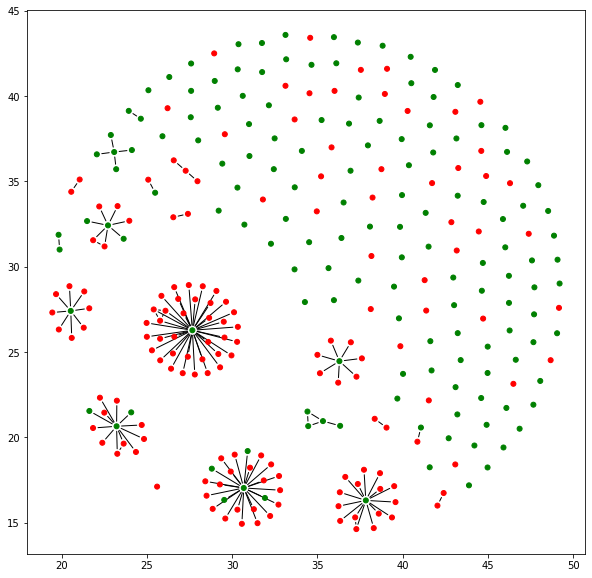

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(g,layout = g.layout("fr"), vertex_color = g.vs["color"], target = ax)
#зеленые - есть подстроки, красные - нет подстрок